## Packages

In [68]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load Data

In [69]:
# Load Raw Data
raw_data = pd.read_csv('Shanghai_2018-4_2019-4.csv')

## Data Preprocessing I 

#### Data Peek

In [70]:
raw_data.head()

,date,parameter,location,value,unit,city,attribution,averagingperiod,coordinates,country,sourcename,sourcetype,mobile
0,"{utc=2018-04-20T11:00:00.000Z, local=2018-04-2...",pm25,Shanghai,28.0,µg/m³,Shanghai,"[{name=StateAir.net, url=http://www.stateair.n...","{unit=hours, value=1.0}","{latitude=31.21, longitude=121.44}",CN,Shanghai,government,False
1,"{utc=2018-04-20T01:00:00.000Z, local=2018-04-2...",pm25,Shanghai,29.0,µg/m³,Shanghai,"[{name=StateAir.net, url=http://www.stateair.n...","{unit=hours, value=1.0}","{latitude=31.21, longitude=121.44}",CN,Shanghai,government,False
2,"{utc=2018-04-20T07:00:00.000Z, local=2018-04-2...",pm25,Shanghai,31.0,µg/m³,Shanghai,"[{name=StateAir.net, url=http://www.stateair.n...","{unit=hours, value=1.0}","{latitude=31.21, longitude=121.44}",CN,Shanghai,government,False
3,"{utc=2018-04-20T06:00:00.000Z, local=2018-04-2...",pm25,Shanghai,25.0,µg/m³,Shanghai,"[{name=StateAir.net, url=http://www.stateair.n...","{unit=hours, value=1.0}","{latitude=31.21, longitude=121.44}",CN,Shanghai,government,False
4,"{utc=2018-04-20T15:00:00.000Z, local=2018-04-2...",pm25,Shanghai,24.0,µg/m³,Shanghai,"[{name=StateAir.net, url=http://www.stateair.n...","{unit=hours, value=1.0}","{latitude=31.21, longitude=121.44}",CN,Shanghai,government,False


In [71]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 13 columns):
date               8072 non-null object
parameter          8072 non-null object
location           8072 non-null object
value              8072 non-null float64
unit               8072 non-null object
city               8072 non-null object
attribution        8072 non-null object
averagingperiod    8072 non-null object
coordinates        8072 non-null object
country            8072 non-null object
sourcename         8072 non-null object
sourcetype         8072 non-null object
mobile             8072 non-null bool
dtypes: bool(1), float64(1), object(11)
memory usage: 764.7+ KB


### What are the data issues to be treated?

#### Duplicates? 

In [72]:
raw_data.duplicated().any()

False

#### Missing Value

In [73]:
raw_data.isnull().any().sum()

0

### DataPreprocessing, Data Extraction (col-by-col)

#### Cols may be suitable to drop
- location
- country
- sourcename
- sourcetype
- average_period
- mobile

Cols with unique values, which can just be summarized into a description. 

In [74]:
# retrieve cols names
raw_data.columns

Index(['date', 'parameter', 'location', 'value', 'unit', 'city', 'attribution',
       'averagingperiod', 'coordinates', 'country', 'sourcename', 'sourcetype',
       'mobile'],
      dtype='object')

In [75]:
# check unique values in certain cols
cols = ['city','location','country','averagingperiod','sourcename', 'sourcetype',
       'mobile']
for col in cols:
    print(col, raw_data[col].unique())

city ['Shanghai']
location ['Shanghai']
country ['CN']
averagingperiod ['{unit=hours, value=1.0}']
sourcename ['Shanghai']
sourcetype ['government']
mobile [False]


In [76]:
# drop above cols (as a result of uniqueness)
raw_data.drop(columns=cols, inplace=True)

In [77]:
# Check 
raw_data.head(2)

,date,parameter,value,unit,attribution,coordinates
0,"{utc=2018-04-20T11:00:00.000Z, local=2018-04-2...",pm25,28.0,µg/m³,"[{name=StateAir.net, url=http://www.stateair.n...","{latitude=31.21, longitude=121.44}"
1,"{utc=2018-04-20T01:00:00.000Z, local=2018-04-2...",pm25,29.0,µg/m³,"[{name=StateAir.net, url=http://www.stateair.n...","{latitude=31.21, longitude=121.44}"


#### Col 'date'
- Year
- Month
- Day
- Hour

In [78]:
# Peek
raw_data.date[0]

'{utc=2018-04-20T11:00:00.000Z, local=2018-04-20T19:00:00+08:00}'

utc: universal coordinated time


- **How to extract year, month, day, time from utc above?**
- **Is the date col  in form of time stamp or str?**

In [79]:
# Only keep utc time 
raw_data['date'] = raw_data['date'].apply(lambda x:x.split(sep=',')[0])
raw_data['date'][0]

'{utc=2018-04-20T11:00:00.000Z'

In [80]:
# covert date str to datetime object (datetime module)
import datetime
fmt = '{utc=%Y-%m-%dT%H:%M:%S.000Z'
raw_data['date'] = raw_data['date'].apply(lambda x:datetime.datetime.strptime(x,fmt))
raw_data['date'][0]

Timestamp('2018-04-20 11:00:00')

In [81]:
# create new cols ['year','month','day','hour']
raw_data['year'] = raw_data['date'].apply(lambda x:x.year)
raw_data['month'] = raw_data['date'].apply(lambda x:x.month)
raw_data['day'] = raw_data['date'].apply(lambda x:x.day)
raw_data['hour'] = raw_data['date'].apply(lambda x:x.hour)
raw_data.tail()

,date,parameter,value,unit,attribution,coordinates,year,month,day,hour
8067,2019-04-18 06:00:00,pm25,49.0,µg/m³,"[{name=StateAir.net, url=http://www.stateair.n...","{latitude=31.21, longitude=121.44}",2019,4,18,6
8068,2019-02-05 22:00:00,pm25,47.0,µg/m³,"[{name=StateAir.net, url=http://www.stateair.n...","{latitude=31.21, longitude=121.44}",2019,2,5,22
8069,2019-04-18 21:00:00,pm25,55.0,µg/m³,"[{name=StateAir.net, url=http://www.stateair.n...","{latitude=31.21, longitude=121.44}",2019,4,18,21
8070,2019-04-18 17:00:00,pm25,57.0,µg/m³,"[{name=StateAir.net, url=http://www.stateair.n...","{latitude=31.21, longitude=121.44}",2019,4,18,17
8071,2019-04-06 20:00:00,pm25,85.0,µg/m³,"[{name=StateAir.net, url=http://www.stateair.n...","{latitude=31.21, longitude=121.44}",2019,4,6,20


#### col 'parameters'
- pollutant types

In [82]:
# TODO

#### col 'attribution'
- sensor station locations

In [83]:
# TODO

#### col 'coordinates'
- geographic infö (regional effect) 

In [84]:
# TODO

### Deal with Wrong Values (col 'value' <=0)

In [85]:
# Check
mask = raw_data['value']<=0 
raw_data[mask]

,date,parameter,value,unit,attribution,coordinates,year,month,day,hour
460,2018-06-06 00:00:00,pm25,-9999.0,µg/m³,"[{name=StateAir.net, url=http://www.stateair.n...","{latitude=31.21, longitude=121.44}",2018,6,6,0
5954,2019-01-11 05:00:00,pm25,-9999.0,µg/m³,"[{name=StateAir.net, url=http://www.stateair.n...","{latitude=31.21, longitude=121.44}",2019,1,11,5


In [86]:
# Drop 
raw_data.drop(index=raw_data[mask].index,inplace=True)

In [87]:
raw_data.shape

(8070, 10)

## Data Understanding / Visualization 

In [88]:
raw_data.describe()

,value,year,month,day,hour
count,8070.000000,8070.000000,8070.000000,8070.000000,8070.000000
mean,55.006568,2018.317968,6.474102,15.827633,11.490087
std,123.270582,0.465716,3.497181,8.828078,6.929193
min,4.000000,2018.000000,1.000000,1.000000,0.000000
25%,21.000000,2018.000000,3.000000,8.000000,5.000000
50%,31.000000,2018.000000,7.000000,16.000000,12.000000
75%,50.000000,2019.000000,10.000000,23.000000,18.000000
max,985.000000,2019.000000,12.000000,31.000000,23.000000


## Q: 

### What is an Avg Value of types of pollutants by hours of a Day?

In [89]:
# Group by pollutants(only have pm2.5, wierd)and hours of day 
# Get avg. value for each hour 
x_label = list(np.sort(raw_data['hour'].unique()))
hour_group_mean = raw_data.groupby(['hour']).mean().reset_index()
hour_group_mean.head()

,hour,value,year,month,day
0,0,57.067449,2018.316716,6.513196,15.809384
1,1,54.618076,2018.314869,6.492711,15.862974
2,2,49.438806,2018.325373,6.504478,15.859701
3,3,65.291545,2018.317784,6.446064,15.935860
4,4,70.216216,2018.321321,6.462462,15.681682


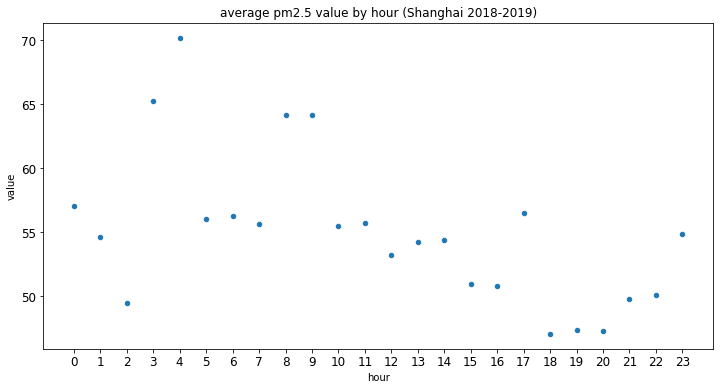

In [96]:
hour_group_mean.plot(kind='scatter',
                     figsize =(12,6),
                     fontsize =12,
                     x='hour',
                     y='value',
                     title='average pm2.5 value by hour (Shanghai 2018-2019)'
                    )
plt.xticks(np.arange(min(x_label), max(x_label)+1, 1.0))
plt.savefig('hour_mean.png')
plt.show()

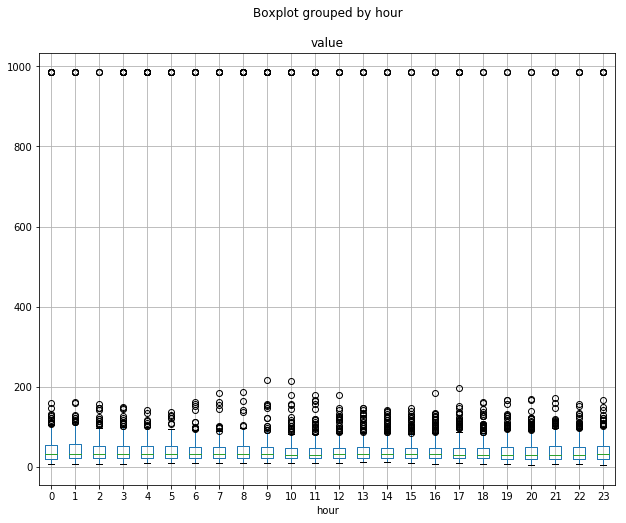

In [97]:
fig, ax = plt.subplots(figsize=(10,8))
raw_data.boxplot(column=['value'], by='hour', ax=ax)
plt.savefig('hour_boxplot.png')
plt.show()

In [92]:
# visulize 
# Q: How do box-plot after group by hours and plot out vs. hours? 

In [93]:
list(np.sort(raw_data['hour'].unique()))


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [94]:
raw_data['parameter'].unique()

array(['pm25'], dtype=object)